In [1]:
import pandas as pd
pd.options.display.max_columns = 200
import numpy as np


def prettyTable(dataframe, column):
    z = pd.DataFrame(columns = [dataframe[column].value_counts(True).index, round(dataframe[column].value_counts(True) * 100, 2).astype(str) + '%', dataframe[column].value_counts()]).T
    return z

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loans_full_schema = pd.read_csv('loans_full_schema.csv')
# print(loans_full_schema['loan_status'].value_counts(dropna = False))
# loans_full_schema

In [4]:
# accepted_2007_to_2018Q4 = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows = 10000)
# accepted_2007_to_2018Q4 = accepted_2007_to_2018Q4[sorted(accepted_2007_to_2018Q4.columns.tolist())]
# print(accepted_2007_to_2018Q4['loan_status'].value_counts(dropna = False))
# accepted_2007_to_2018Q4

## Cleaning and Initial EDA

In [5]:
cr_loan2 = pd.read_csv('cr_loan2.csv')
cr_loan2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
print(cr_loan2['loan_status'].value_counts(True, dropna = False))
cr_loan2['loan_status'].value_counts(dropna = False)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64


0    25473
1     7108
Name: loan_status, dtype: int64

In [7]:
df = cr_loan2.copy()
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
mean_pel = df[df['person_emp_length'].isna() != True]['person_emp_length'].mean()
mean_lir = df[df['loan_int_rate'].isna() != True]['loan_int_rate'].mean()

print(mean_pel)
print(mean_lir)

4.789686296787225
11.01169489224439


In [10]:
min(df['loan_int_rate'])
max(df['loan_int_rate'])

23.22

In [11]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_lir)
df['person_emp_length'] = df['person_emp_length'].fillna(mean_pel)

In [12]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
df.loan_grade.value_counts(True)

A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: loan_grade, dtype: float64

In [15]:
df.cb_person_default_on_file.value_counts(True)

N    0.82367
Y    0.17633
Name: cb_person_default_on_file, dtype: float64

In [16]:
min(df.person_age)
max(df.person_age)

144

In [17]:
df[df.person_age > 75]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.510000,0,0.06,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,11.011695,0,0.27,N,27
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.710000,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,N,24
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.940000,0,0.20,N,25


In [18]:
df = df[df.person_age <= 100]
len(df)

32576

In [19]:
len(df[df.loan_int_rate > 15])
# len(df[df.loan_int_rate < 10])

3441

In [20]:
df['int_group'] = np.where(df.loc[:, 'loan_int_rate'] < 10, 'under 10%', 
                           (np.where((df.loc[:, 'loan_int_rate'] >= 10) & (df.loc[:, 'loan_int_rate'] <= 15), '10% - 15%', 'over 15%')))


prettyTable(df, 'int_group')


,,
,int_group,int_group
10% - 15%,54.17%,17647
under 10%,35.27%,11488
over 15%,10.56%,3441


In [21]:
df['age_group'] = np.where(df['person_age'] <25, 'under 25', 
                           (np.where((df['person_age'] >= 25) & (df['person_age'] <35), '25 - 35', 'over 35')))


prettyTable(df, 'age_group')


,,
,age_group,age_group
25 - 35,49.67%,16180
under 25,37.8%,12315
over 35,12.53%,4081


In [22]:
df['risk_group'] = np.where((df['loan_grade'] == 'A') | (df['loan_grade'] == 'B'), 'low risk', 
                           (np.where((df['loan_grade'] == 'C') | (df['loan_grade'] == 'D'), 'medium risk', 'high risk')))


prettyTable(df, 'risk_group')


,,
,risk_group,risk_group
low risk,65.16%,21225
medium risk,30.95%,10082
high risk,3.9%,1269


In [23]:
df.person_income.max()

df[df['person_income'] == df.person_income.max()]
df[df['person_income'] == df.person_income.min()]


df['income_group'] = np.where((df['person_income'] < 65000), 'under 65k', 
                           (np.where((df['person_income'] >= 65000) & (df['person_income'] <= 125000), '65k - 125k', '> 125k')))


prettyTable(df, 'income_group')


,,
,income_group,income_group
under 65k,61.13%,19913
65k - 125k,32.33%,10531
> 125k,6.54%,2132


In [24]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,over 15%,under 25,medium risk,under 65k
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k


In [25]:
prettyTable(df, 'loan_intent')

,,
,loan_intent,loan_intent
EDUCATION,19.8%,6451
MEDICAL,18.64%,6071
VENTURE,17.55%,5717
PERSONAL,16.94%,5520
DEBTCONSOLIDATION,16.0%,5212
HOMEIMPROVEMENT,11.07%,3605


In [26]:
prettyTable(df, 'loan_grade')

,,
,loan_grade,loan_grade
A,33.08%,10777
B,32.07%,10448
C,19.82%,6456
D,11.13%,3626
E,2.96%,964
F,0.74%,241
G,0.2%,64


In [27]:
prettyTable(df, 'person_home_ownership')

,,
,person_home_ownership,person_home_ownership
RENT,50.48%,16443
MORTGAGE,41.26%,13442
OWN,7.93%,2584
OTHER,0.33%,107


In [28]:
min(df['person_emp_length'])
max(df['person_emp_length'])

123.0

In [29]:
df = df[df['person_emp_length'] < 50]
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k


In [30]:
min(df['loan_amnt'])
max(df['loan_amnt'])

35000

In [31]:
df['loan_size'] = np.where((df['loan_amnt'] < 10000), 'under 10k', 
                           (np.where((df['loan_amnt'] >= 10000) & (df['loan_amnt'] < 20000), '10k - 20k', '> 20k')))


prettyTable(df, 'loan_size')


,,
,loan_size,loan_size
under 10k,57.91%,18862
10k - 20k,32.42%,10560
> 20k,9.68%,3152


In [32]:
df.loan_percent_income.min()
df.loan_percent_income.max()

0.83

In [33]:
df[df.loan_percent_income == df.loan_percent_income.max()]
df[df.loan_percent_income >= .8]
df[df.loan_percent_income == df.loan_percent_income.min()]
df[df.loan_percent_income == df.loan_percent_income.median()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size
59,24,12000,OWN,2.0,VENTURE,E,1750,11.011695,0,0.15,Y,3,10% - 15%,under 25,high risk,under 65k,under 10k
103,25,230000,MORTGAGE,5.0,MEDICAL,C,35000,13.990000,0,0.15,N,4,10% - 15%,25 - 35,medium risk,> 125k,> 20k
250,22,14400,OWN,0.0,PERSONAL,B,2100,11.140000,0,0.15,N,4,10% - 15%,under 25,low risk,under 65k,under 10k
301,25,162000,MORTGAGE,5.0,DEBTCONSOLIDATION,E,25000,16.000000,1,0.15,Y,3,over 15%,25 - 35,high risk,> 125k,> 20k
349,25,165000,MORTGAGE,0.0,HOMEIMPROVEMENT,F,25000,19.740000,0,0.15,N,4,over 15%,25 - 35,high risk,> 125k,> 20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32541,52,163000,MORTGAGE,9.0,PERSONAL,D,25000,14.110000,1,0.15,N,30,10% - 15%,over 35,medium risk,> 125k,> 20k
32554,60,98000,RENT,1.0,HOMEIMPROVEMENT,D,15000,16.290000,1,0.15,N,29,over 15%,over 35,medium risk,65k - 125k,10k - 20k
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.380000,0,0.15,N,21,10% - 15%,over 35,low risk,> 125k,> 20k
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19,under 10%,over 35,low risk,65k - 125k,10k - 20k


In [34]:
df['loan_to_income_grouping'] = np.where((df['loan_percent_income'] < .1), 'under 10%', 
                           (np.where((df['loan_percent_income'] >= .1) & (df['loan_percent_income'] < .25), '10% - 25%', '> 25%')))


prettyTable(df, 'loan_to_income_grouping')


,,
,loan_to_income_grouping,loan_to_income_grouping
10% - 25%,51.04%,16626
under 10%,27.47%,8948
> 25%,21.49%,7000


## EDA and Visuals

In [35]:
# can use of crosstab make this analysis easier?

In [36]:
# groupings of diff categories by loan status
# hist of income, emp length

# loan status by age, by income level, by home ownnership
# by int rate amt, by loan amt

In [37]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%


In [38]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


##### Income Group

In [39]:
df['income_group'].groupby(df.loan_status).value_counts(True)

loan_status  income_group
0            under 65k       0.559901
             65k - 125k      0.364668
             > 125k          0.075431
1            under 65k       0.795413
             65k - 125k      0.175039
             > 125k          0.029548
Name: income_group, dtype: float64

In [40]:
df['loan_status'].groupby(df.income_group).value_counts(True)

income_group  loan_status
65k - 125k    0              0.881873
              1              0.118127
> 125k        0              0.901455
              1              0.098545
under 65k     0              0.716101
              1              0.283899
Name: loan_status, dtype: float64

##### Age Group

In [41]:
df['age_group'].groupby(df.loan_status).value_counts(True)

loan_status  age_group
0            25 - 35      0.502101
             under 25     0.371226
             over 35      0.126674
1            25 - 35      0.477417
             under 25     0.402279
             over 35      0.120304
Name: age_group, dtype: float64

In [42]:
df['loan_status'].groupby(df.age_group).value_counts(True)

age_group  loan_status
25 - 35    0              0.790297
           1              0.209703
over 35    0              0.790493
           1              0.209507
under 25   0              0.767806
           1              0.232194
Name: loan_status, dtype: float64

##### Home Ownership

In [43]:
df['person_home_ownership'].groupby(df.loan_status).value_counts(True)

loan_status  person_home_ownership
0            MORTGAGE                 0.461421
             RENT                     0.441787
             OWN                      0.093886
             OTHER                    0.002906
1            RENT                     0.730407
             MORTGAGE                 0.237794
             OWN                      0.027156
             OTHER                    0.004643
Name: person_home_ownership, dtype: float64

In [44]:
df['loan_status'].groupby(df.person_home_ownership).value_counts(True)

person_home_ownership  loan_status
MORTGAGE               0              0.874265
                       1              0.125735
OTHER                  0              0.691589
                       1              0.308411
OWN                    0              0.925310
                       1              0.074690
RENT                   0              0.684284
                       1              0.315716
Name: loan_status, dtype: float64

##### Loan Intent

In [45]:
df['loan_intent'].groupby(df.loan_status).value_counts(True)

loan_status  loan_intent      
0            EDUCATION            0.209683
             VENTURE              0.191189
             MEDICAL              0.174736
             PERSONAL             0.173636
             DEBTCONSOLIDATION    0.146150
             HOMEIMPROVEMENT      0.104606
1            MEDICAL              0.228085
             DEBTCONSOLIDATION    0.209652
             EDUCATION            0.156325
             PERSONAL             0.154355
             HOMEIMPROVEMENT      0.132405
             VENTURE              0.119178
Name: loan_intent, dtype: float64

In [46]:
df['loan_status'].groupby(df.loan_intent).value_counts(True)

loan_intent        loan_status
DEBTCONSOLIDATION  0              0.714121
                   1              0.285879
EDUCATION          0              0.827779
                   1              0.172221
HOMEIMPROVEMENT    0              0.738974
                   1              0.261026
MEDICAL            0              0.732993
                   1              0.267007
PERSONAL           0              0.801232
                   1              0.198768
VENTURE            0              0.851819
                   1              0.148181
Name: loan_status, dtype: float64

##### Loan Grade

In [47]:
df['loan_grade'].groupby(df.loan_status).value_counts(True)

loan_status  loan_grade
0            A             0.381003
             B             0.343464
             C             0.200927
             D             0.058311
             E             0.013468
             F             0.002788
             G             0.000039
1            D             0.301112
             B             0.239341
             C             0.188406
             A             0.150978
             E             0.087379
             F             0.023920
             G             0.008864
Name: loan_grade, dtype: float64

In [48]:
df['loan_status'].groupby(df.loan_grade).value_counts(True)

loan_grade  loan_status
A           0              0.900427
            1              0.099573
B           0              0.837194
            1              0.162806
C           0              0.792596
            1              0.207404
D           1              0.590345
            0              0.409655
E           1              0.644191
            0              0.355809
F           1              0.705394
            0              0.294606
G           1              0.984375
            0              0.015625
Name: loan_status, dtype: float64

##### Loan Size

In [49]:
df['loan_size'].groupby(df.loan_status).value_counts(True)

loan_status  loan_size
0            under 10k    0.599364
             10k - 20k    0.318569
             > 20k        0.082067
1            under 10k    0.506261
             10k - 20k    0.344308
             > 20k        0.149430
Name: loan_size, dtype: float64

In [50]:
df['loan_status'].groupby(df.loan_size).value_counts(True)

loan_size  loan_status
10k - 20k  0              0.768277
           1              0.231723
> 20k      0              0.663071
           1              0.336929
under 10k  0              0.809246
           1              0.190754
Name: loan_status, dtype: float64

##### Interest Rate Risk

In [51]:
df['int_group'].groupby(df.loan_status).value_counts(True)

loan_status  int_group
0            10% - 15%    0.540935
             under 10%    0.402325
             over 15%     0.056740
1            10% - 15%    0.544674
             over 15%     0.280709
             under 10%    0.174617
Name: int_group, dtype: float64

In [52]:
df['loan_status'].groupby(df.int_group).value_counts(True)

int_group  loan_status
10% - 15%  0              0.780643
           1              0.219357
over 15%   1              0.579942
           0              0.420058
under 10%  0              0.891965
           1              0.108035
Name: loan_status, dtype: float64

##### Risk Ratings / Loan Grade

In [53]:
df['risk_group'].groupby(df.loan_status).value_counts(True)

loan_status  risk_group 
0            low risk       0.724467
             medium risk    0.259237
             high risk      0.016296
1            medium risk    0.489517
             low risk       0.390319
             high risk      0.120163
Name: risk_group, dtype: float64

In [54]:
df['loan_status'].groupby(df.risk_group).value_counts(True)

risk_group   loan_status
high risk    1              0.672971
             0              0.327029
low risk     0              0.869299
             1              0.130701
medium risk  0              0.654895
             1              0.345105
Name: loan_status, dtype: float64

##### Income Groups

In [55]:
df['income_group'].groupby(df.loan_status).value_counts(True)

loan_status  income_group
0            under 65k       0.559901
             65k - 125k      0.364668
             > 125k          0.075431
1            under 65k       0.795413
             65k - 125k      0.175039
             > 125k          0.029548
Name: income_group, dtype: float64

In [56]:
df['loan_status'].groupby(df.income_group).value_counts(True)

income_group  loan_status
65k - 125k    0              0.881873
              1              0.118127
> 125k        0              0.901455
              1              0.098545
under 65k     0              0.716101
              1              0.283899
Name: loan_status, dtype: float64

##### Loan to Income Ratio

In [57]:
df['loan_to_income_grouping'].groupby(df.loan_status).value_counts(True)

loan_status  loan_to_income_grouping
0            10% - 25%                  0.549967
             under 10%                  0.310794
             > 25%                      0.139239
1            > 25%                      0.486000
             10% - 25%                  0.368651
             under 10%                  0.145350
Name: loan_to_income_grouping, dtype: float64

In [58]:
df['loan_status'].groupby(df.loan_to_income_grouping).value_counts(True)

loan_to_income_grouping  loan_status
10% - 25%                0              0.842415
                         1              0.157585
> 25%                    0              0.506571
                         1              0.493429
under 10%                0              0.884555
                         1              0.115445
Name: loan_status, dtype: float64

### Summarizing the relationships between Loan Status and independent variables

**The lower two income groups see higher rates of default, and make up a greater share of the defaults. In particular, the under 65k group sees a much higher level of risk**

    * 80% of all defaults are within the under 65k group
    * 28% of the under 65k group defaulted

**73% of all defaults were in the Rent category (50% of records were renters)**

**The Other category and Rent category have a 31% default rate**

**Medical and Debt Consolidation make up the highest portions of defaults at 23% and 21% respectively. Debt Consolidation also has the highest Default rate among the Loan Intent categories. This makes sense given that debt consolidtion often takes place among those in difficult financial situations.**

**30% of all defaults were grade D, and 24% were grade B. C and D together make up roughly half of all defaults. Grades D, E, F, and G all had default rates of 59% or higher. This makes sense since lower grades equate to higher risk. Higher default rates are expected within these groups. Conversely, grades A, B, and C see default rates of 10%, 16%, and 21% respectively.**

**The larger the loan amount, the higher the rate of default. A higher borrowing value means higher payments and therefore higher risk for the borrower.**

**When looking at loan to income ratios, loans that were greater than 25% of income had a 50% default rate. Roughly half of all defaults came form the greater than 25% group.**

**The lower the income, the higher the default rate.**

**The higher the interest rate, the higher the default rate.**

### Visualizations

In [59]:
# income group and loan status
# income amount and loan status
# interest rate and loan status

# hist of age group, income group

# loan status with interest rate risk, legend = loan grade

# loan to income ratio with interest rate risk, legend = loan status

# box plot of loan size

# income group with loan size or loan to income ratio, legend = loan status

# save the images down for write-up?

# hue = ownership type

# hue = risk group (grade, int rate, age group, loan nto income ratio, income group, int rate group)

In [60]:
sns.set(rc={'figure.figsize':(15,8.27)})

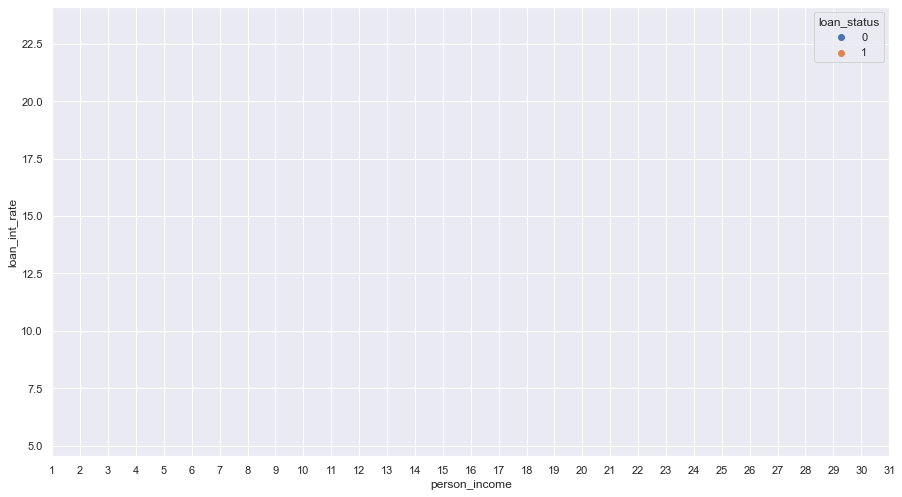

In [61]:
# sns.scatterplot(x = df['person_income'], y = df['loan_int_rate'], hue = df['loan_status'])

fig, ax = plt.subplots()
sns.scatterplot(x = df['person_income'], y = df['loan_int_rate'], hue = df['loan_status'])
ax.set_xlim(1,31)
ax.set_xticks(range(1,32))
plt.show()

<AxesSubplot:xlabel='loan_int_rate', ylabel='person_income'>

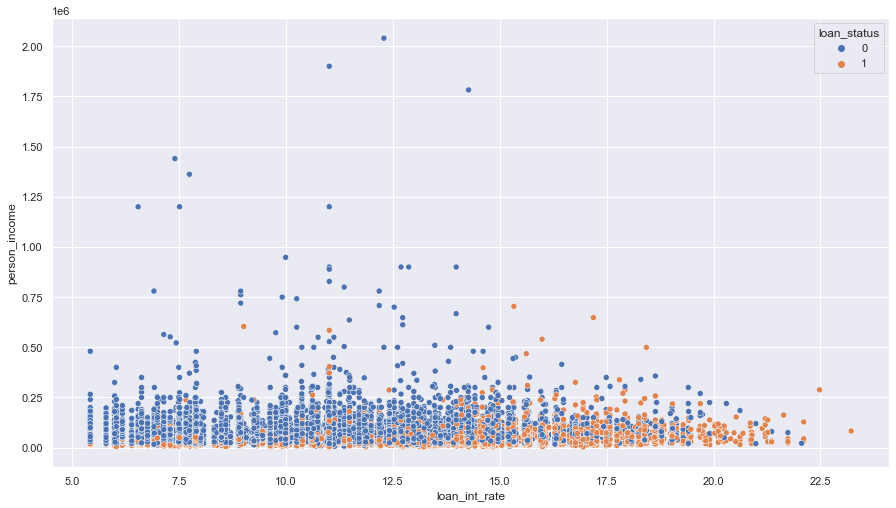

In [62]:
sns.scatterplot(x = df['loan_int_rate'], y = df['person_income'], hue = df['loan_status'])

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_to_income_grouping'>

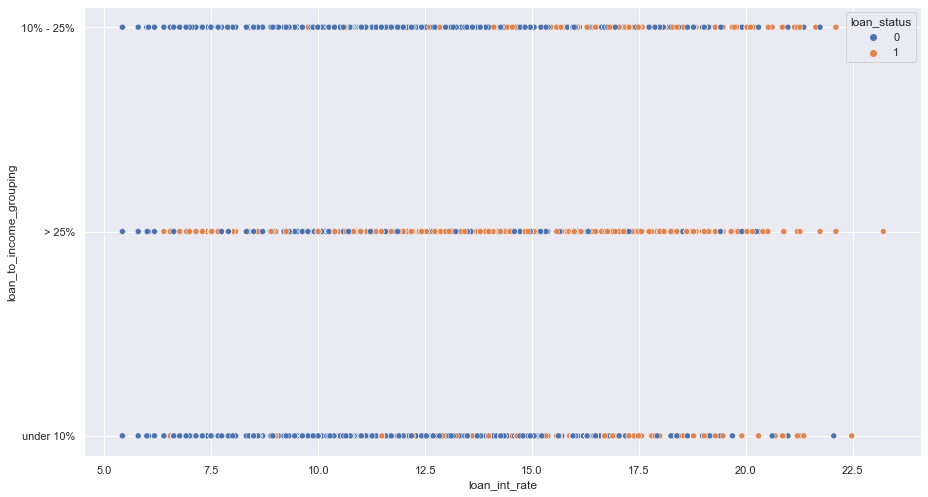

In [63]:
sns.scatterplot(x = df['loan_int_rate'], y = df['loan_to_income_grouping'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='person_income'>

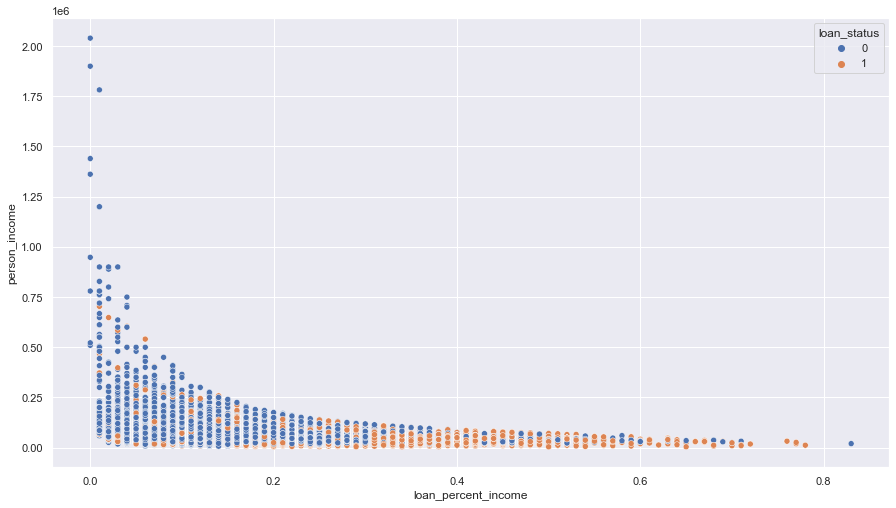

In [64]:
sns.scatterplot(x = df['loan_percent_income'], y = df['person_income'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_amnt'>

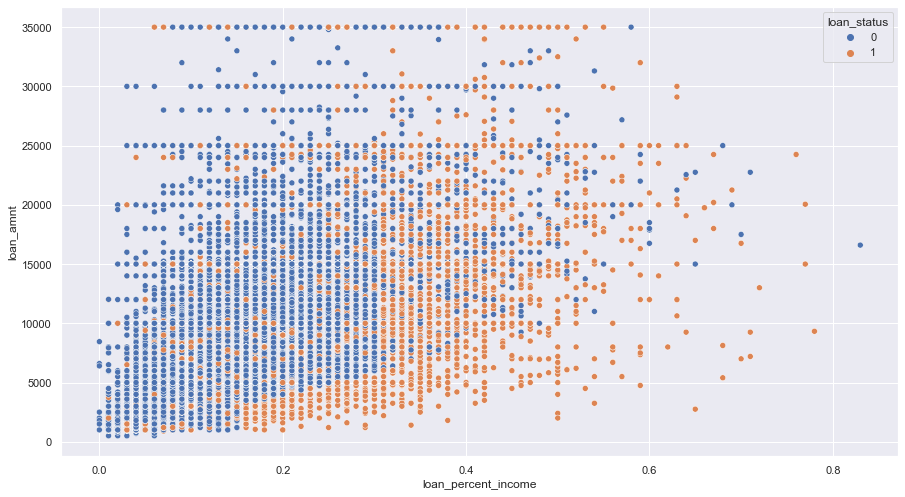

In [65]:
sns.scatterplot(x = df['loan_percent_income'], y = df['loan_amnt'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_int_rate'>

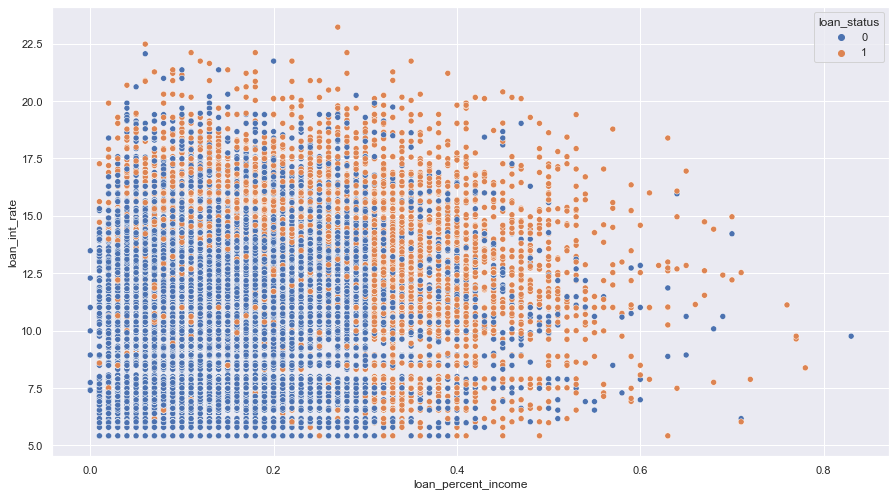

In [66]:
sns.scatterplot(x = df['loan_percent_income'], y = df['loan_int_rate'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_int_rate'>

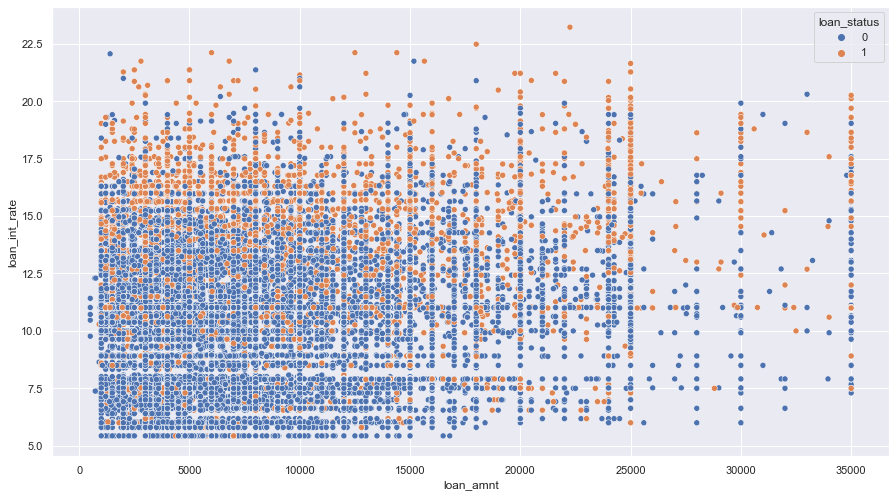

In [67]:
sns.scatterplot(x = df['loan_amnt'], y = df['loan_int_rate'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_amnt', ylabel='person_income'>

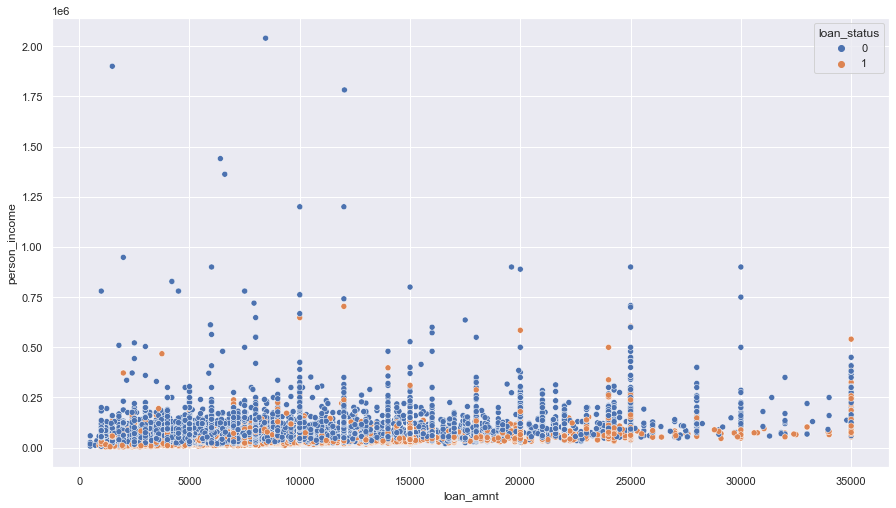

In [68]:
sns.scatterplot(x = df['loan_amnt'], y = df['person_income'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

In [69]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


<AxesSubplot:>

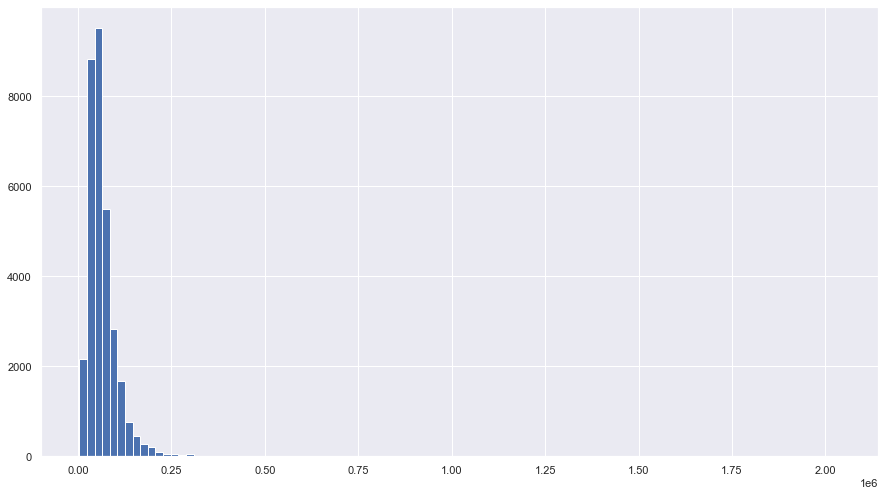

In [70]:
df.person_income.hist(bins = 100)

<AxesSubplot:>

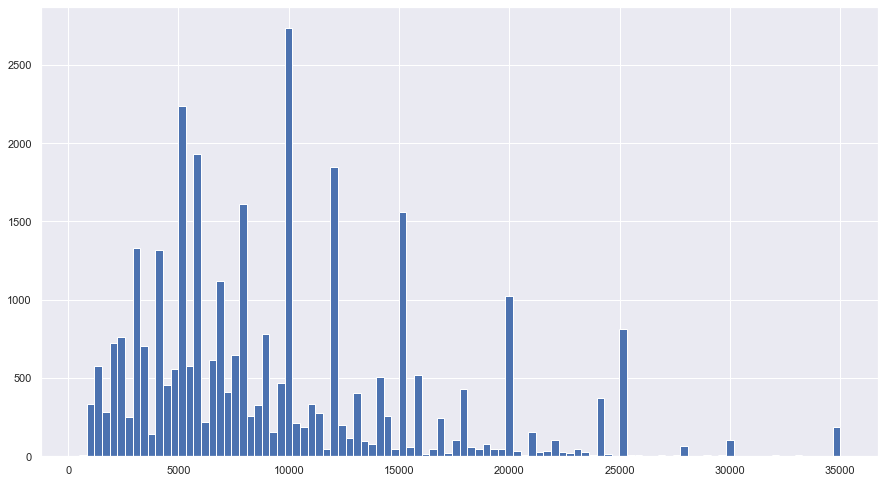

In [71]:
df.loan_amnt.hist(bins = 100)

In [146]:
# come back to viz

## Can we segment the data to isolate defaults before we get to ML?

In [122]:
len(df[df['loan_status'] == 1])

7107

In [123]:
len(df[(df['loan_status'] == 1) & (df['person_home_ownership'] == 'RENT')])

5191

In [124]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A')])

6034

**A baseline rule can be to reject all loans that aren't Grade A.**

In [125]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] == 'RENT')])

4426

In [126]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] != 'MORTGAGE')])

4583

In [127]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] == 'MORTGAGE')])

1451

In [128]:
len(df[(df['loan_status'] == 1) & (df['loan_amnt'] > 2000) & (df['person_home_ownership'] == 'RENT')])

4934

In [129]:
len(df[(df['loan_status'] == 1) & (df['loan_amnt'] > 2000) & (df['loan_grade'] != 'A')])

5745

In [91]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 10) & (df['loan_grade'] != 'A')]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 7)]))

5734
6813


**Basline rule: reject all loans with Interest Rate greater than 7%**

In [93]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 10) & (df['loan_grade'] != 'A')]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_grade'] != 'A')]))

5734
6034


In [99]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.1)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07) & (df['person_age'] >= 25)]))

6074
6612
3931


In [105]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] != 'MORTGAGE')]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] == 'RENT')]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] == 'RENT')]))

5286
5063
5063


In [115]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07) & (df['loan_amnt'] > 1000)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) & ((df['person_home_ownership'] == 'RENT') | (df['person_home_ownership'] == 'MORTGAGE'))]))

6591
6846
6846
6623


In [116]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))

6846


In [121]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) & (df['person_income'] < 500000)]))

6845


In [118]:
df[df['loan_status'] == 1].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,7107.000000,7107.000000,7107.000000,7107.000000,7107.000000,7107.0,7107.000000,7107.000000
mean,27.475447,49124.262839,4.146713,10847.104967,12.874165,1.0,0.246841,5.685381
std,6.263746,36909.787452,3.792999,7138.100644,3.195009,0.0,0.132094,4.103373
min,20.000000,4000.000000,0.000000,900.000000,5.420000,1.0,0.010000,2.000000
25%,23.000000,30000.000000,1.000000,5000.000000,10.990000,1.0,0.140000,3.000000
50%,26.000000,41496.000000,3.000000,9600.000000,12.990000,1.0,0.240000,4.000000
75%,30.000000,59498.500000,6.000000,15000.000000,15.310000,1.0,0.340000,8.000000
max,70.000000,703800.000000,34.000000,35000.000000,23.220000,1.0,0.780000,30.000000


In [77]:
df[df['loan_status'] == 0].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4,under 10%,under 25,low risk,65k - 125k,> 20k,> 25%
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,10% - 15%,under 25,low risk,> 125k,> 20k,under 10%
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4,under 10%,under 25,low risk,65k - 125k,> 20k,> 25%
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4,under 10%,25 - 35,low risk,> 125k,> 20k,10% - 25%


In [76]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


In [143]:
# (df['loan_status'] == 1) & 
prettyTable(df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)], 'loan_status')

,,
,loan_status,loan_status
0,77.36%,23398
1,22.64%,6846


In [144]:
print(23398 / 25467)
print(6846 / 7107)

0.9187576078847135
0.9632756437315323


In [145]:
# calculating the loss based on these numbers given accepted loans that are bad/good

In [ ]:
prettyTable(df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)], 'loan_status')

In [157]:
df_segment = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]

df_segment_def = df_segment[df_segment['loan_status'] == 1]

df_segment_non = df_segment[df_segment['loan_status'] == 0]

defs = len(df_segment_def)
nons = len(df_segment_non)

print('Breakdown of segmented dataframe')
print('Defaults: ', defs / len(df_segment))
print('Non-Defaults: ', nons / len(df_segment))

def_num = len(df[df['loan_status'] == 1])
non_num = len(df[df['loan_status'] == 0])

print('\n')
print('Capture rates of segmented dataframe')
print('Defaults: ', defs / def_num)
print('Non-Defaults: ', nons / non_num)

Breakdown of segmented dataframe
Defaults:  0.2263589472292025
Non-Defaults:  0.7736410527707975


Capture rates of segmented dataframe
Defaults:  0.9632756437315323
Non-Defaults:  0.9187576078847135


In [150]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


Now lets look at the loss amounts for the defaulted loans, as well as the loss that is avoided by declining the defaulting loans rejected by the segmenting rules.

We also want to look at the total amount lent for good loans, the revenue collected, and the revenue missed by declining good loans rejected by the segmenting rules.

## Prepping the Data for ML

## Using ML to Predict Defaults

In [73]:
# need a probability output
# logistic regression
# gradient boost
# xg boost (need to install library?)

# random forest?
# bayes?



## Evaluating the ML Results

## Evaluating the Credit Risk
### Based on the ML Results
* What are the PD, LGD, EAD values? Conversely, what's our expected recovery rate/amount?

* How does changing our acceptance rate of bad loans change our results?

* How does changing the threshold value of probability of default affect our results?

* Given our final predictions, acceptance rates, and threshold values, what patterns / insights do we see relative to credit risk amongst the variables?



## Conclusion

### Final Recommendations

### Conclusions